# DAG interface

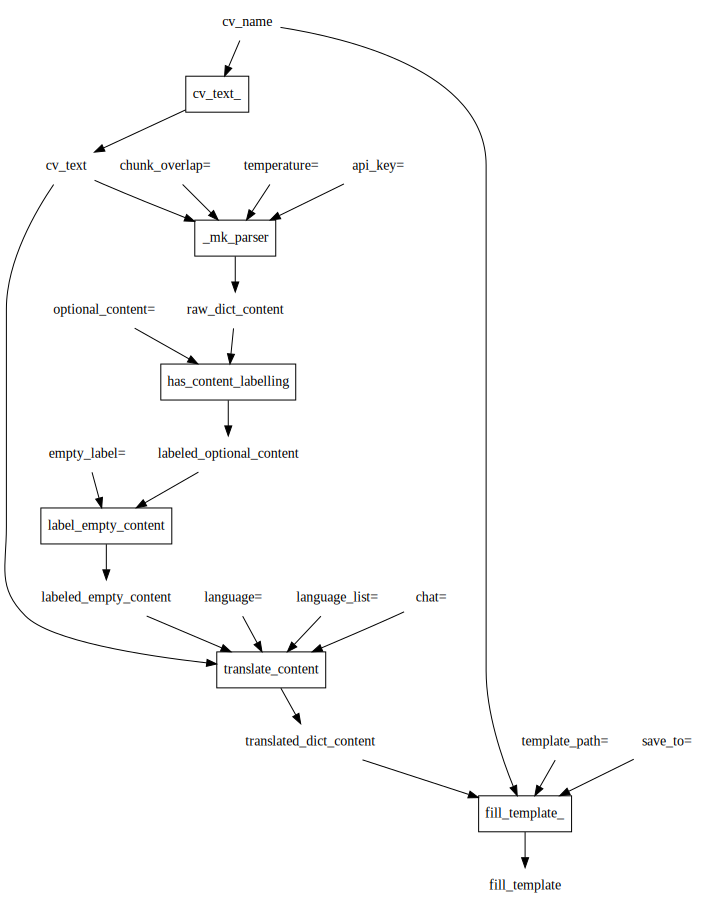

In [4]:
from smart_cv import dag_pipeline
from smart_cv.base import mall
dag = dag_pipeline[:"fill_template"]
dag.dot_digraph()

In [52]:
from smart_cv.base import mall
list(mall.cvs)

['Guillaume.pdf',
 'SCH.pdf',
 'CHAABANE Mohamed.pdf',
 'q_header.docx',
 'HASNAOUI dhekra_CV (1).pdf',
 'Zineb_LAAMARCHI_CV.pdf.235224236 (1).pdf',
 'cv_2024_OMN.pdf',
 'OUSSAMA belcaid_CV.pdf',
 'CV_2024-03-31_Kanda Soufiane_KABA.pdf',
 'cv_2024_OMN_filled.docx',
 'CV_Jonathan.docx',
 'CV_Elena.docx',
 'CV CHAABANE Mohamed (1)_filled.docx',
 'BEN AFIA Wassim_CV.pdf',
 'quentin.pdf']

In [2]:
mall.cvs['q_header.docx']

'\n\n\n\n----media/image1.png----Quentin Roman\n\nExpérience : Missing information\n\nDisponibilité : As soon as possible\n\nMobilité : Missing information\n\nSoftware Engineer\nCompétences :\n\n\nPython, C#, Java, JavaScript, Angular, Node, React, .NET, SQL, Git\n\nExpériences : \n\n\nModel Training for Machine Learning: September 2022 - September 2023\nAmadeus\n\nDeveloped Web-based Angular Application for Hospitality IT business\n\nmissions: \nEnhanced internal Diagnostic tools with new features\n\nImplemented secure permissions system\n\nInvestigated and resolved production issues\n\n\nStacks : C#, Unity, Python, Jupyter Notebook\n\nSoftware Development: September 2021 - February 2022\nAalborg University\n\nDeveloped a VR application for medical purposes\n\nmissions: \nConducted testing sessions involving students and patients\n\nOptimized code for enhanced performance\n\nAnalyzed eye-tracking data\n\n\nStacks : Javascript, C#, Java\n\nNetwork Administration: January 2021 - June 20

In [2]:
content = dag('Guillaume.pdf')

NameError: name 'dag' is not defined

# Association rules
find missing stacks

In [3]:
## -------------- Re compute the transactions ----------------
from smart_cv.stack_mining import mall, full_stack_db, stack_db, jobs_db, dag
transactions = dag[:"transactions"](mall.cvs.items(), full_stack_db)
print(f'Number of transactions: {len(transactions)}')
print(f"Number of stacks: {len(stack_db)}")

#save the transactions
import pickle
filename_path = mall.stack_mining.rootdir + "/transactions.pkl"
with open(filename_path, 'wb') as f:
    pickle.dump(transactions, f)

Number of transactions: 50
Number of stacks: 113


In [1]:
from smart_cv.stack_mining import mall
# load the transactions
import pickle
filename_path = mall.stack_mining.rootdir + "/transactions.pkl"
with open(filename_path, 'rb') as f:
    transactions = pickle.load(f)

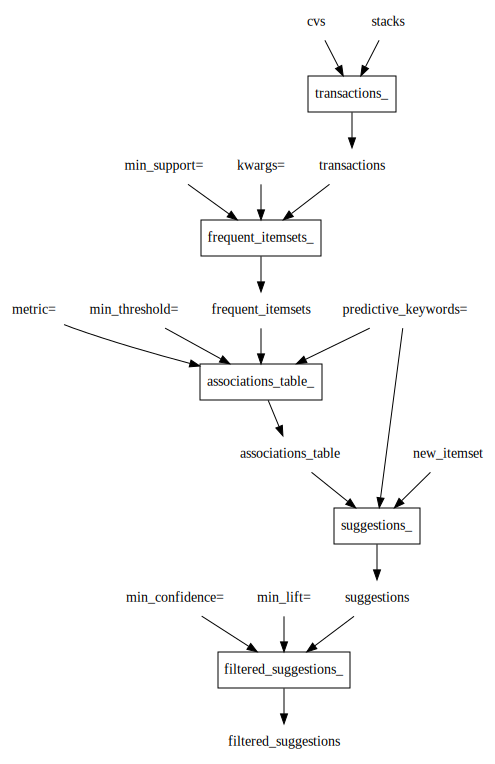

In [2]:
from smart_cv.stack_mining import dag 
dag.dot_digraph()

In [3]:
f = dag["transactions":"associations_table"](transactions=transactions, min_support=0.1)
#f.plot.bar(x='itemsets', y='support')
print(len(f))
f.head(100)

850590


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(agile),(angular),0.28,0.38,0.16,0.571429,1.503759,0.0536,1.446667,0.465278
1,(agile),(api),0.28,0.54,0.16,0.571429,1.058201,0.0088,1.073333,0.076389
2,(agile),(c#),0.28,0.26,0.14,0.500000,1.923077,0.0672,1.480000,0.666667
3,(c#),(agile),0.26,0.28,0.14,0.538462,1.923077,0.0672,1.560000,0.648649
4,(developer),(agile),0.18,0.28,0.10,0.555556,1.984127,0.0496,1.620000,0.604878
...,...,...,...,...,...,...,...,...,...,...
95,(api),(java),0.54,0.46,0.34,0.629630,1.368760,0.0916,1.458000,0.585678
96,(java),(api),0.46,0.54,0.34,0.739130,1.368760,0.0916,1.763333,0.498911
97,(api),(javascript),0.54,0.60,0.40,0.740741,1.234568,0.0760,1.542857,0.413043
98,(javascript),(api),0.60,0.54,0.40,0.666667,1.234568,0.0760,1.380000,0.475000


In [3]:
from smart_cv.stack_mining import evaluate
filtered_transactions = [s for s in transactions if len(s) > 1]
# measure time 
import time

def test_evaluate(range_min_metric, suggestor, verbose):
    f2 = []
    avg_len_suggestion = []
    avg_saved = []
    avg_precision = []
    avg_recall = []
    for m in range_min_metric:
    #for ml in range_min_length:
        frequent_itemsets = dag["transactions":"frequent_itemsets"](transactions=transactions, min_support=m)
        print(f"len frequent_itemsets = {len(frequent_itemsets)}")
        start = time.time()
        _f2_, _avg_len_suggestion_, _avg_saved_, _avg_precision_, _avg_recall_ = evaluate(filtered_transactions, 
                                                                                            frequent_itemsets, 
                                                                                            suggestor, 
                                                                                            max_missing_percentage=0.2,
                                                                                            max_nb_missing=5,
                                                                                            verbose=verbose)
        stop = time.time()
        print(f"Time for predictions: {stop-start:.2f} s")
        print("\n")
        f2.append(_f2_)
        avg_len_suggestion.append(_avg_len_suggestion_)
        avg_saved.append(_avg_saved_)
        avg_precision.append(_avg_precision_)
        avg_recall.append(_avg_recall_)
    return f2, avg_len_suggestion, avg_saved, avg_precision, avg_recall


from functools import partial

suggestor = partial(dag["frequent_itemsets":"filtered_suggestions"], frequent_itemsets=f, metric="lift", min_threshold=2)
range_min_support = [0.14]
f2, avg_len_suggestion, avg_saved, avg_precision, avg_recall = test_evaluate(range_min_support, suggestor=suggestor, verbose=1)

len frequent_itemsets = 3667
precision = 0.08391115643279363, recall = 0.6921768707482994, f2 = 13.844751895605155
avg_len_suggestion = 23.26530612244898, avg_saved = 1.7346938775510203
last_missing :  ['javascript', 'git']
last_suggestion :  {'net', 'java', 'jira', 'spring', 'docker', 'aws', 'engineer', 'azure', 'c#', 'api', 'git', 'backend', 'angular', 'mysql', 'cloud', 'jenkins', 'react', 'kubernetes', 'python', 'ingénieur', 'postgresql', 'sql', 'management', 'gestion', 'kafka', 'javascript'}
Time for predictions: 24.52 s




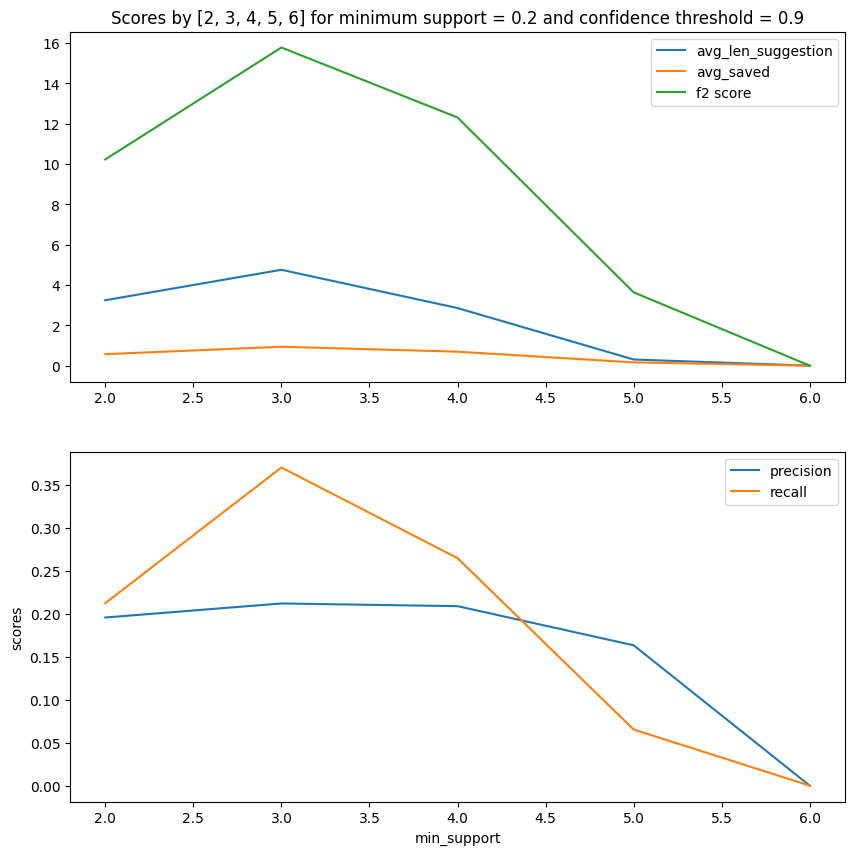

In [13]:

import matplotlib.pyplot as plt

feature = range_min_length

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(feature, avg_len_suggestion, label='avg_len_suggestion')
plt.plot(feature, avg_saved, label='avg_saved')
plt.plot(feature, f2, label='f2 score')
plt.title(f'Scores by {feature} for minimum support = 0.2 and confidence threshold = 0.9')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(feature, avg_precision, label='precision')
plt.plot(feature, avg_recall, label='recall')
plt.xlabel('min_support')
plt.ylabel('scores')
plt.legend()
plt.show()


# Missed content when parsing

In [15]:
from meshed import DAG
from oa import prompt_function, chat
from functools import partial
template = "I will give you a text extracted from a pdf but with errors like unwated spaces or special characters. You will have to clean it and return the cleaned text. Here is the text: \n\n{content}\n\nPlease clean it and return the cleaned text."
my_chat = partial(chat, temperature=0)
f = prompt_function(template, prompt_func=my_chat)

def concat_json_text(d:dict)->str:
    text = ""
    for key, value in d.items():
        if isinstance(value, dict):
            text += concat_json_text(value)
        elif isinstance(value, list):
            for item in value:
                if isinstance(item, dict):
                    text += concat_json_text(item)
                else:
                    text += str(item) + ", "
        else:
            text +=  str(value) + ", "
    return f(content=text)

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def text(concat_json_text:str)->str:
    return concat_json_text


def lemmentizer(text:str)->list[str]:
    # Tokenisation des mots dans le texte
    tokens = word_tokenize(text)
    
    # Initialisation du lemmatiseur WordNet
    lemmatizer = WordNetLemmatizer()
    
    # Récupération des mots vides (stop words)
    stop_words = set(stopwords.words('english'))

    # Ponctuations à ignorer
    punkt = {'.', ',', ';', '!', '?', ':', '(', ')', '[', ']', '{', '}', '<', '>', '/', '\\', '|', '-', '_', '+', '=', '*', '&', '^', '%', '$', '#', '@', '~', '`', "'", '"'}
    
    # Lemmatisation des mots en ignorant les mots vides
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word not in punkt]
    
    return lemmatized_words

# # Exemple d'utilisation
# text = "I am a developer and I am Working on a project TO develop a NEW application !&&"
# lemmas = lemmentizer(text)
# print(lemmas)

def symetric_difference(text1, text2):
    return set(lemmentizer(text1)).symmetric_difference(set(lemmentizer(text2)))

def intersection(text1, text2):
    if isinstance(text1, str):
        set1 = set(lemmentizer(text1))
    else:
        set1 = text1
    if isinstance(text2, str):
        set2 = set(lemmentizer(text2))
    else:
        set2 = text2
    return set1.intersection(set2)

def missing_words(original_text:str, copy:str)->set:
    return set(lemmentizer(original_text)).difference(set(lemmentizer(copy)))

# text1 = "Rédaction de rapports"
# text2 = "lecture des rapports"

# symetric_difference(text1, text2)
# print(intersection(text1, text2))
# print(missing_words(text1, text2))

def missed_content(original_text:str, json_content:dict):
    json_text = concat_json_text(json_content)
    return symetric_difference(original_text, json_text)

[nltk_data] Downloading package punkt to /Users/alexis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/alexis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
m = missed_content(mall.cvs['quentin.pdf'], content)

NameError: name 'content' is not defined

In [ ]:
mall.cvs['quentin.pdf']

'French\nEnglish\n› TOEIC : 975/990\nExperimen ting VR\nApplica tions\n(C# / U nity)\nModel Training f or\nMachine L earning\nexperimen tation with a\nsmall D atase t\n(Python / Jupyter\nNotebook)\nData Backup and\nEncryp tion S oftware\n(C# / WPF  / MVVM)\nLanguag es\nJavascrip t, C#, Java,\nPython, PHP , C++, C\nFrame work\nAngular , Node, Lar avel,\nReact, S pring, Expr ess,\n.NET\nCommon\nVirtualiza tion, D ocker, Git,\nMongoDB, Linux, Virtual\nReality , SQL, D ata Scienc e\nSoft\nProblem-S olving,\nAdaptability , Attention t o\nDetail, S elf-MotivationQuentin ROMAN\nLooking f or a Job in S oftware Developmen t\nNewly Gradua ted Software Engineer , Team Worker, Motivated and\nPassiona te with ne w Technolo gies.\nEngineering D egree in C omput er Scienc e\nCESI  Nice From 2018  to 2023\nAcademic B ackgr ound\n• Network Administr ation        • Cyber  Security\n• Software Developmen t           • Web D evelopmen t\n• Database M anag emen t             • Data Analysis\n• Project P la

In [ ]:
#build my own tokenizer
from nltk.tokenize import word_tokenize

def tokenizer(text:str)->list[str]:
    return word_tokenize(text)

In [ ]:
MAX_SIZE = 30
from raglab.retrieval.lib_alexis import num_tokens, tokens

def aggregate_sub_dict(d1:dict, d2:dict):
    for key, value in d2.items():
        if key in d1:
            if isinstance(value, dict):
                d1[key] = aggregate(d1[key], value)
            elif isinstance(value, list):
                d1[key] += value
            elif isinstance(value, str):
                d1[key] += value # TODO call llm
        else:
            d1[key] = value
    return d1

d1 = {'name': 'Guillaume', 
      'age': 25, 
      'skills': ['Python', 'Java', 'C++'], 
      'experience': {'company': 'Google', 'position': 'Software Engineer'}
      }

d2 = {'name': 'bidule',
        'skills': ['Python', 'Java', 'C++', 'JavaScript'],
        'experience': {'company': 'Google', 'position': 'Software Engineer', 'duration': '2 years'}
        }

d3 = {'name': 'Alexis'}

aggregate_sub_dict(d1, d2)

{'name': 'Guillaumebidule',
 'age': 25,
 'skills': ['Python', 'Java', 'C++', 'Python', 'Java', 'C++', 'JavaScript'],
 'experience': {'company': 'GoogleGoogle',
  'position': 'Software EngineerSoftware Engineer',
  'duration': '2 years'}}

In [ ]:
from oa import chat
chat("tell me a joke", model="gpt-4-32k")

NotFoundError: Error code: 404 - {'error': {'message': 'The model `gpt-4-32k` does not exist or you do not have access to it.', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}

In [ ]:
from functools import partial
from oa.base import chat
my_chat = partial(chat, model="gpt-4")
f = prompt_function(template, prompt_func=my_chat)

In [ ]:
keywords = mall.config['stacks_keywords.txt']

original = f(mall.cvs['quentin.pdf'])

retreived = concat_json_text(dag('quentin.pdf'))

Content retrieved:  {'FullName': 'Quentin Roman', 'JobTitle': 'Software Engineer', 'avaibility': 'Immediately', 'mobility': 'none', 'seniority': 'Newly Graduated', 'skills': 'Python, C#, Java, JavaScript, Angular, Node, React, .NET, SQL, Git, MongoDB, Linux, Virtual Reality', 'certifications': 'none', 'experiences': [{'title': 'Software Development', 'company': 'Aalborg University Denmark', 'dates': 'September 2021 - February 2022', 'description': 'Developed a VR application for medical purposes, aiding in the recovery of stroke patients.', 'tasks': ['Conducted testing sessions involving students and patients to gather feedback and refine the application', 'Optimized code and implemented multi-threading techniques for enhanced performance', 'Analyzed eye-tracking data for user interaction insights'], 'tools': 'Python, C#, VR technologies'}, {'title': 'Network Administration', 'company': 'Tournaire Grasse, France', 'dates': 'January 2021 - June 2021', 'description': 'Administered networ

In [ ]:
retreived = concat_json_text(second_dict)
missed = missing_words(original, retreived)
missed_keywords = intersection(keywords, missed)
print(missed)
print(missed_keywords)

{'september', 'optimized', 'science', 'involving', 'dataset', 'experimenting', 'grasse', 'engineer', 'technique', 'experience', '2018', 'backup', 'self-motivation', 'cisco', 'efficient', 'notebook', 'production', 'environment', 'angular', 'planning', 'recovery', 'performance', 'june', 'using', 'patient', 'web', 'purpose', 'aiding', 'model', 'newly', 'git', 'attention', 'centralized', 'encryption', 'skill', 'multi-factor', 'nice', 'soft', 'permission', 'january', 'refine', 'system', '975/990', 'medical', 'enhanced', 'authenticator', 'university', 'experimentation', 'investigated', 'tool', 'issue', 'virtual', 'administered', 'implemented', 'conducted', 'collaborated', 'maintained', 'student', 'application', 'virtualization', 'ptr', 'vsphere', 'vpn', 'gather', 'installation', 'jupyter', 'software', 'multi-threading', 'mongodb', 'session', 'tournaire', 'access', 'french', 'linux', 'problem', 'graduated', 'cesi', 'report', '20', 'motivated', 'trouble', 'computer', 'laravel', 'express', 'job

In [ ]:
template_correction = """I will give you a resume and some keywords you have to find in the resume. Then fill my json with the keywords
Here is the resume: \n\n{resume}\n\nHere are the keywords: \n\n{keywords}\n\nHere is the json: \n\n{json}\n\nPlease fill the json with the keywords and preserve the json format with double quotes.
Keep all the initial content of my json and add the missing keywords."""

second_fill = prompt_function(template_correction)

second_json = second_fill(resume=original, keywords=missed_keywords, json=content)

In [ ]:
second_json

'{\n    "FullName": "Guillaume Bernard",\n    "JobTitle": "Ingénieur Backend Junior",\n    "avaibility": "dès aujourd’hui",\n    "mobility": "Missing information",\n    "seniority": "Missing information",\n    "skills": "Python, Java, Docker, Bash",\n    "certifications": "Certificat d\'anglais avancé (C1)",\n    "experiences": [\n        {\n            "title": "Ingénieur Backend Junior",\n            "company": "Beewey Consulting",\n            "dates": "2023 - 3 mois",\n            "description": "Migration de données, développement cloud, microservices, API",\n            "tasks": ["Missing information"],\n            "tools": "C, JSON, Flask, Terraform, VSCode"\n        },\n        {\n            "title": "Ingénieur Fiabilité de Site",\n            "company": "Thales DIS",\n            "dates": "2022 - 1 an",\n            "description": "Service de gestion des incidents",\n            "tasks": ["Missing information"],\n            "tools": "Missing information"\n        },\n      

In [ ]:
import json
second_dict = json.loads(second_json)

In [ ]:
second_dict

{'FullName': 'Guillaume Bernard',
 'JobTitle': 'Ingénieur Backend Junior',
 'avaibility': 'dès aujourd’hui',
 'mobility': 'Missing information',
 'seniority': 'Missing information',
 'skills': 'Python, Java, Docker, Bash',
 'certifications': "Certificat d'anglais avancé (C1)",
 'experiences': [{'title': 'Ingénieur Backend Junior',
   'company': 'Beewey Consulting',
   'dates': '2023 - 3 mois',
   'description': 'Migration de données, développement cloud, microservices, API',
   'tasks': ['Missing information'],
   'tools': 'C, JSON, Flask, Terraform, VSCode'},
  {'title': 'Ingénieur Fiabilité de Site',
   'company': 'Thales DIS',
   'dates': '2022 - 1 an',
   'description': 'Service de gestion des incidents',
   'tasks': ['Missing information'],
   'tools': 'Missing information'},
  {'title': 'Maitre-Nageur',
   'company': 'Aqualand, Parc Aquatique',
   'dates': '2020 - 3 mois',
   'description': 'Surveillant de baignade',
   'tasks': ['Missing information'],
   'tools': 'Missing infor

# Streamlit

In [ ]:
from smart_cv import ContentRetriever
import json 
keywords_text = """Python, C,, Perl, Ruby, MatLab, Mathematica, Assembleur, VB, XML, Java, JEE, J2EE, JavaScript, PHP, R,, CSS, C\+\+, IOS, Swift, Android, Kotlin, Flutter, Dart, Rust, Ionic, Cordova, Reactnative, Xamarin, Babylon.js, C\#, F\#, WordPress, ThreeJS, WebGL,
TensorFlow, Spark, Spring, Angular, Structs, Ember, Vue, Django, React, .NET,, .NET Core, Cocoapods, Osgi, Selenium, QA, Nest, Express, Symphony, Falcon, ASP.NET, WinDev, Flask, PySpark, Hibernate,
Hive, Impala, Oracle, MySQL, Acess, SQL, SQL Server, PostgreSQL, Mongo, MariaDB, DBA,
API, Unit Testing, Test Unitaire, Azure, Docker, Bamboo, Kubernetes, Jenkins, Jasmine, Karma, MVC, AWS,
Git, Tortoise, TFS, CVS, SVN, MVC, GNU RCS, GNU CSSC, CVSNT, GNU arch, Darcs, DCVS, Monotone, Codeville, Mercurial, Bazaar, Fossil, Veracity, Pijul, SCCS, PVCS, Rational ClearCase, Harvest, CMVC, Visual SourceSafe, AccuRev SCM, Sourceanywhere, Team Foundation Server, Rational Synergy, Rational Team Concert, BitKeeper, Plastic SCM, IIS active directory, 2IS,
Datawarehouse, Machine Learning, NLP, DeepLearning, Réseau de Neurones, kNN, k\-NN, Régression Linéaire, SVM, Régression Logistique, Arbre de Décission, Fôrets Aléatoires, gradient boosting, PCA, Analyse en Composantes Principales, DataLake, DataFactory, PowerBI, Tableau, Qlikesense, GCP, OpenCV, Computer Vision, 
Gestion, Organization, Management, Agile, Scrum, Trello, JIRA, MS Project, Confluence, Sprint, GANTT, Specifications, Redaction, Cahier de charges, Workshop, Atelier, AMOA, PMO"""
with open("prompt_dict.json", "r") as f:
    prompt_dict = json.load(f)

def match_kewords(keywords_text, text):
    """ Returns """
    keywords = keywords_text.split(", ")
    kw_list = []
    for kw in keywords:
        if kw in text:
            if kw in ["R,", "C,"]:
                continue
            kw_list.append(kw)
    for letter in ["R", "C"]:
        for specials in [" {letter}.", " {letter},", " {letter} "]:
            if specials in text:
                kw_list.append(letter)
    return kw_list

def keywords_score(matched, pred):
    pred = [kw.lower() for kw in pred]
    score = 0
    sames = []
    missed = []
    for kw in matched:
        if kw.lower() in pred:
            score += 1
            sames.append(kw)
        else:
            missed.append(kw)
    score = score / len(matched)
    return score, sames, missed

In [ ]:
print(match_kewords(keywords_text, parser.dict_content["competences"]))

['Python', 'Perl', 'Java', 'Selenium', 'Express', 'Azure', 'Docker', 'Kubernetes', 'Jenkins', 'SVN']


In [ ]:
print(match_kewords(keywords_text, parser.dict_content["competences"]))

In [ ]:
#get list of files in directory
import os
directory = "../smart_cv/data/cvs"
files = os.listdir(directory)
# remove .DS_Store file
files.remove(".DS_Store")
print(files)
key = "your key here"
avg_score = 0
for cv_file in files:
    print(f"\nprocessing {cv_file}")
    parser = ContentRetriever(cv_path=directory+"/"+cv_file, api_key=key,
                    prompts=prompt_dict, chunk_size=20000, chunk_overlap=0, temperature=1.5, k=5)

    fullcontent = "" 
    for doc in parser.documents:
        fullcontent += doc.page_content

    matched = match_kewords(keywords_text, fullcontent)
    print(f"matched: {matched}")
    parser.retrieve_content(verbose=False)

    llm_keywords = parser.dict_content["competences"].split(", ")
    print(f"llm_keywords: {llm_keywords}")
    score, intersection, missed = keywords_score(matched, llm_keywords)
    avg_score += score
    print(f"score: {score},\n intersection: {intersection},\n missed: {missed}")

avg_score = avg_score / len(files)
print(f"average score: {avg_score}")

['Guillaume.pdf', 'SCH.pdf', 'Adil.pdf', 'Nappee-Thomas.pdf', 'Thor_Whalen_CV.pdf']

processing Guillaume.pdf
matched: ['Python', 'Java', 'JavaScript', 'CSS', 'Spring', 'Flask', 'SQL', 'PostgreSQL', 'Docker', 'GCP']


InternalServerError: Error code: 500 - {'error': {'message': 'Failed to create completion as the model generated invalid Unicode output. Unfortunately, this can happen in rare situations. Consider reviewing your prompt or reducing the temperature of your request. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID req_eccc43ef3a5318f641401cc799dbf0e4 in your message.)', 'type': 'server_error', 'param': None, 'code': 'invalid_model_output'}}

Temperature=0 => avg score = 0.327
Temperature=0.5 => avg score = 0.27
Temperature=1 => avg score = 0.30


# Check content with instructions

In [ ]:
instructions = [
            "Less than 11 bullet points for each experience",
            "More than 3 bullet points for each experience",
            "Framework versions have to be mentioned",
            "Tasks done during experiences have to be mentioned",
            "Context of the projects have to be mentioned: like dates, role, team size, company size, etc",
            "Technical stacks have to be mentioned in experiences",
            "There has to be contact information",
            "If the profil is developer, there has to be a github link. Otherwise it is ok if there is no github link"
]

In [ ]:
from misc.CriteriaChecker import CriteriaChecker

In [ ]:
cc = CriteriaChecker(instructions, parser.dict_content)

In [ ]:
cc.score

0.875

In [ ]:
cc.status

{'Less than 11 bullet points for each experience': True,
 'More than 3 bullet points for each experience': True,
 'Framework versions have to be mentioned': True,
 'Tasks done during experiences have to be mentioned': True,
 'Context of the projects have to be mentioned: like dates, role, team size, company size, etc': True,
 'Technical stacks have to be mentioned in experiences': True,
 'There has to be contact information': True,
 'If the profil is developer, there has to be a github link. Otherwise it is ok if there is no github link': False}

In [ ]:
cc.add_criterion("French or English language")

In [ ]:
cc.status  

{'Less than 11 bullet points for each experience': True,
 'More than 3 bullet points for each experience': True,
 'Framework versions have to be mentioned': True,
 'Tasks done during experiences have to be mentioned': True,
 'Context of the projects have to be mentioned: like dates, role, team size, company size, etc': True,
 'Technical stacks have to be mentioned in experiences': True,
 'There has to be contact information': True,
 'If the profil is developer, there has to be a github link. Otherwise it is ok if there is no github link': True,
 'French or English language': True}

In [ ]:
cc.score

1.0

In [ ]:
cc.feedback()

NameError: name 'cc' is not defined